## Working with USGS data

*Olm* contains a variety of functions for retrieving discharge and water quality data from NWIS, the USGS water database. These functions are contained within the [`olm.USGS`](https://olm.readthedocs.io/en/master/olm.USGS.html) package.

In [ ]:
#Check whether we are running on Colab or locally.
try:
    import google.colab
    IN_COLAB = True
    base_path = 'https://raw.githubusercontent.com/CovingtonResearchGroup/olm-examples/main/'
except:
    IN_COLAB = False
    base_path = './'
print('Base working path for data files is',base_path)


In [ ]:
#If olm isn't already installed (or if you're running in Colab), then run this cell of code.
!pip install olm-karst

In [8]:
#We will run in pylab mode, to import plotting functions.
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Obtaining metadata about a USGS site

In [2]:
from olm.USGS.DataRetrieval import GetSiteData
#Use a USGS site number to retrieve the data
site_no = 'USGS-07056000' #Buffalo River near St Joe, AR

StJoe_meta = GetSiteData(site_no)
StJoe_meta

OrganizationIdentifier                                                                       USGS-AR
OrganizationFormalName                                            USGS Arkansas Water Science Center
MonitoringLocationIdentifier                                                           USGS-07056000
MonitoringLocationName                                                Buffalo River near St. Joe, AR
MonitoringLocationTypeName                                                                    Stream
MonitoringLocationDescriptionText                                                                NaN
HUCEightDigitCode                                                                           11010005
DrainageAreaMeasure/MeasureValue                                                                 829
DrainageAreaMeasure/MeasureUnitCode                                                            sq mi
ContributingDrainageAreaMeasure/MeasureValue                                               

#### Obtaining daily discharge values

You can obtain a daily average discharge value for a given date using [`olm.USGS.DataRetrieval.GetDailyDischarge()`](https://olm.readthedocs.io/en/master/olm.USGS.DataRetrieval.GetDailyDischarge.html#olm.USGS.DataRetrieval.GetDailyDischarge)

In [4]:
from olm.USGS.DataRetrieval import GetDailyDischarge
Q = GetDailyDischarge(site_no, '2021-01-01')
#Discharge and some additional metadata are returned in a dictionary
print(Q)

Discharge query html:  https://waterservices.usgs.gov/nwis/dv?format=waterml,1.1&sites=07056000&startDT=2021-01-01&endDT=2021-01-01
{'discharge': '6830', 'quality': 'P', 'name': 'Buffalo River near St. Joe, AR'}


In [5]:
print('Mean discharge on January 1, 2021 was',Q['discharge'], 'cfs')

Mean discharge on January 1, 2021 was 6830 cfs


You can obtain a mean daily discharge record for a longer period using  [`olm.USGS.DataRetrieval.GetDailyDischargeRecord()`](https://olm.readthedocs.io/en/master/olm.USGS.DataRetrieval.GetDailyDischargeRecord.html#olm.USGS.DataRetrieval.GetDailyDischargeRecord).

Text(0, 0.5, 'Stream flow (cfs)')

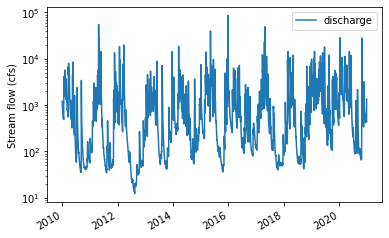

In [12]:
from olm.USGS.DataRetrieval import GetDailyDischargeRecord
StJoe_Q = GetDailyDischargeRecord(site_no, '2010-01-01', '2020-12-31')
#Discharge and some additional metadata are returned in a dictionary
StJoe_Q.plot(logy=True)
ylabel('Stream flow (cfs)')

### Automatic queries of water quality data

The most powerful functionality of the `olm.USGS` package lies in its ability to query, download, and process large sets of water quality data from a list of USGS sites. To set up one of these queries, you need to create or modify two files.
1. Create a text file that contains a list of the site numbers of interest, each on its own line.
2. Modify the runWQXtoPandas Excel file to provide the desired chemical parameters to query and a variety of other settings that control the query and how the data are stored (open the [provided Excel file](https://raw.githubusercontent.com/CovingtonResearchGroup/olm-examples/USGS/USGS/runWQXtoPandas-Buffalo-Start-File.xls) to see an example).